In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [2]:
# read in data
player_fps = {} # dictionary with avg and min fps and single avg and min fps
LOG_FILE = os.path.join(os.curdir, r'log\prolog.log')
with open(LOG_FILE, 'r') as fhandle:
    player_name = ''
    for line in fhandle:
        if '[OPT] (FPS)' in line:     
            #print(line)
            if 'Avg. FPS for' in line:
                start_ix = line.index('Avg. FPS for')
                start_player_ix = start_ix + len('Avg. FPS for ')
                player_name = line[start_player_ix:].split(':')[0]
                player_fps[player_name] = [[int(n) for n in (line.split(player_name + ': ')[1]).strip("\"\n[]").split(',')]]
            if 'Min. FPS for' in line:
                start_ix = line.index('Min. FPS for')
                player_fps[player_name].append([int(n) for n in (line.split(player_name + ': ')[1]).strip("\"\n[]").split(',')])
            if 'Single avg. FPS for' in line:
                player_fps[player_name].append(float((line.split(player_name + ': ')[1]).strip("\n\"")))
            if 'Single min. FPS for' in line:
                player_fps[player_name].append(float((line.split(player_name + ': ')[1]).strip("\n\"")))
                
        

In [10]:
player_fps.keys()

dict_keys(['SERVER', '[DEW]Daniel Emsi', '=B2F= Maxim Kaminski', '[WGP]eXcalibur', 'Dominik', '=B2F= Vadi Kaminski', '[GNC]Kesseleddy', 'Kai', 'DerSven78', 'Henry Dalton', 'HardiReady', 'ElLoco', 'Saxe', 'S1ckBoY', 'CjiNoo', 'GBKings', 'Brian771', '[WGP]Pacman', '-Heiko-', 'Murda]X[', 'Gelir', '|NATO|Tobgru', 'Harbicht', 'Paolo[GNC]', 'Kalle', 'Certain Death', 'Pumarang', 'OPPA NOLF', 'Bernhard', 'Andi-de', '[GNC]Lord-MDB', 'Scott', 'Elefant statt Vaterland', 'Raffda', 'form', '[EGC] junky82', 'mehrb00n', '[DEW] Zocker', 'Frozen_byte', 'KLI |NOLF|', 'Paul', 'Gisi [NOLF]', 'Preacher', 'Matze', 'Dave', 'Protox', '[GNC]Thrower', 'Niffer', 'Manu', 'L. Canavar', '[GNC]eXtrem', 'Delta', 'Schrecki', 'Wookey', 'old'])

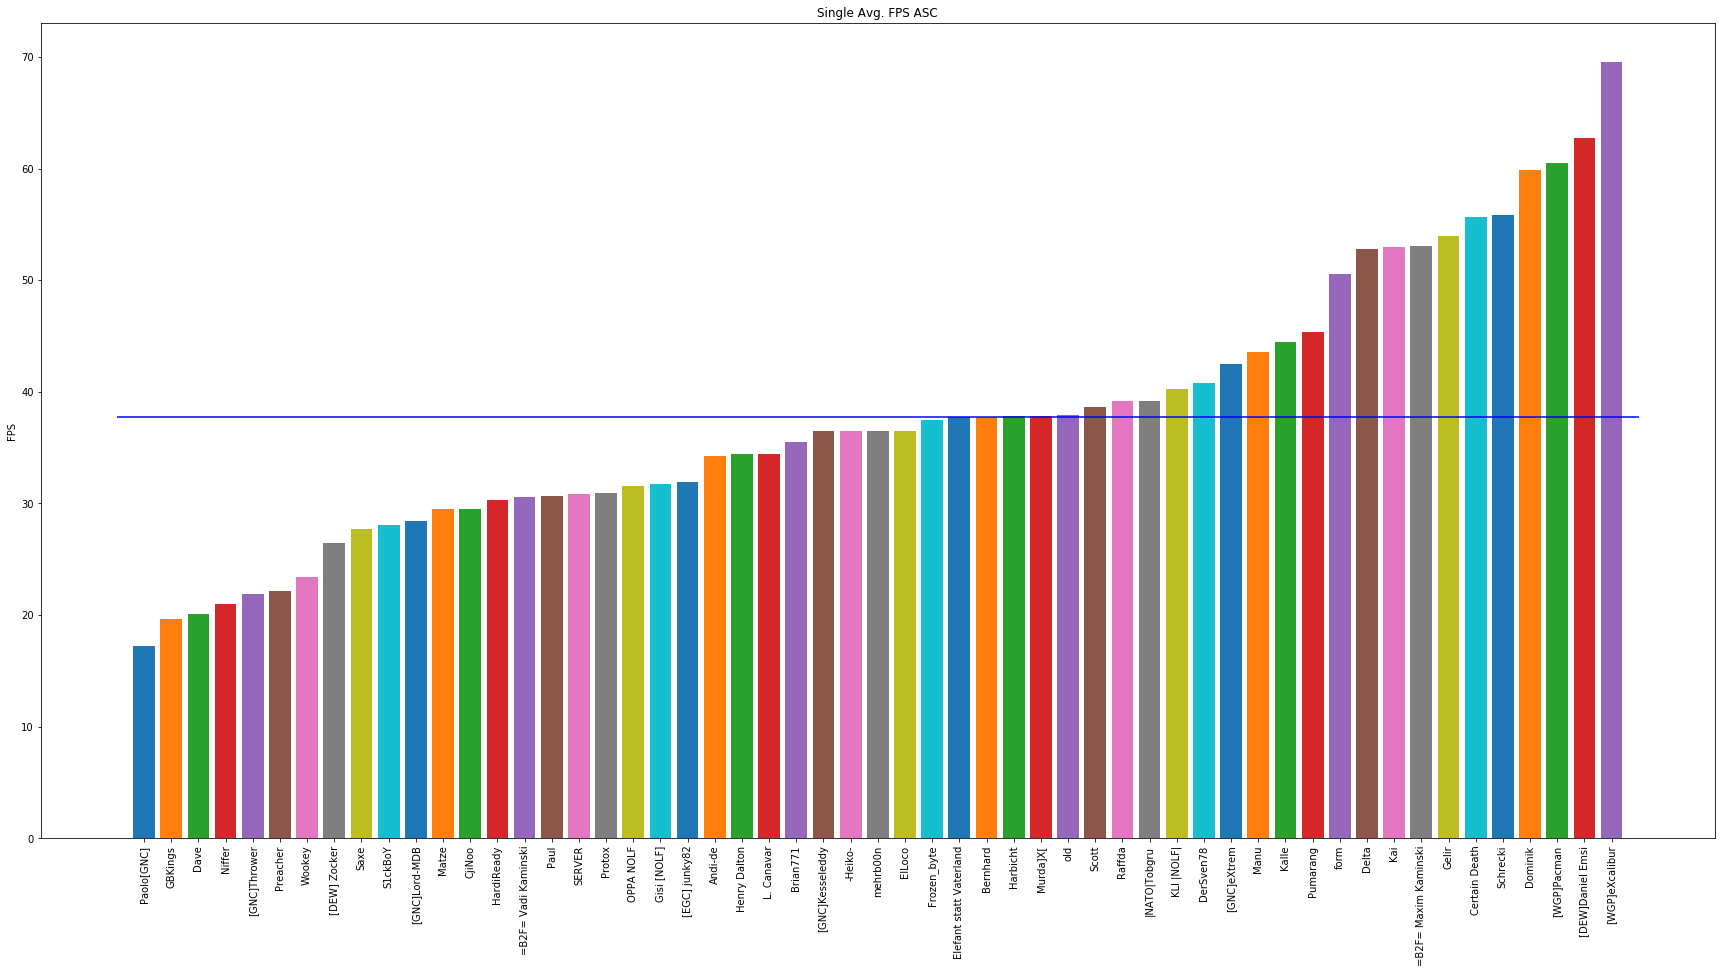

In [3]:
# plot data
col = 2
# single avg fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: kv[1][col]):
    plt.bar(name, data[col], label=name)
    
plt.ylabel("FPS")
plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("Single Avg. FPS ASC")
plt.hlines(np.mean([x[col] for x in player_fps.values()]), -1, len(player_fps), color="blue")
plt.savefig(os.path.join(os.curdir, "output\single_avg_fps.png"))


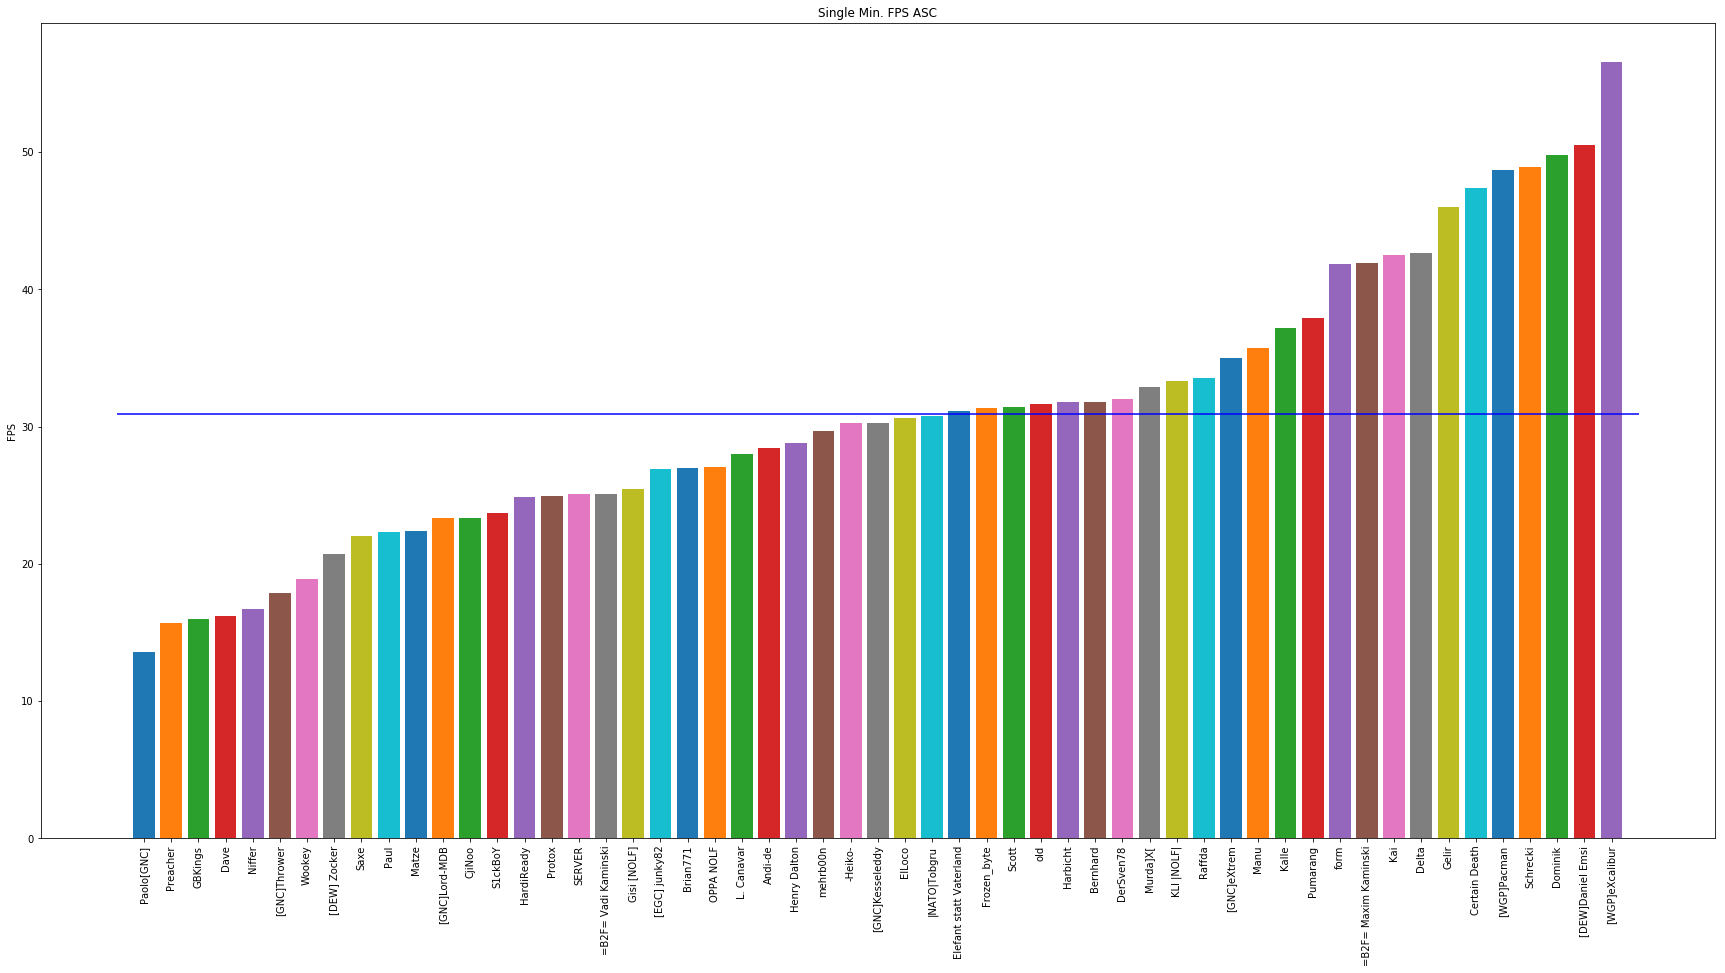

In [4]:
# plot data
col = 3
# single min fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: kv[1][col]):
    plt.bar(name, data[col], label=name)

plt.ylabel("FPS")
plt.xticks(rotation=90)

#plt.legend(loc="right")
plt.title("Single Min. FPS ASC")
plt.hlines(np.mean([x[col] for x in player_fps.values()]), -1, len(player_fps), color="blue")
plt.savefig(os.path.join(os.curdir, "output\single_min_fps.png"))

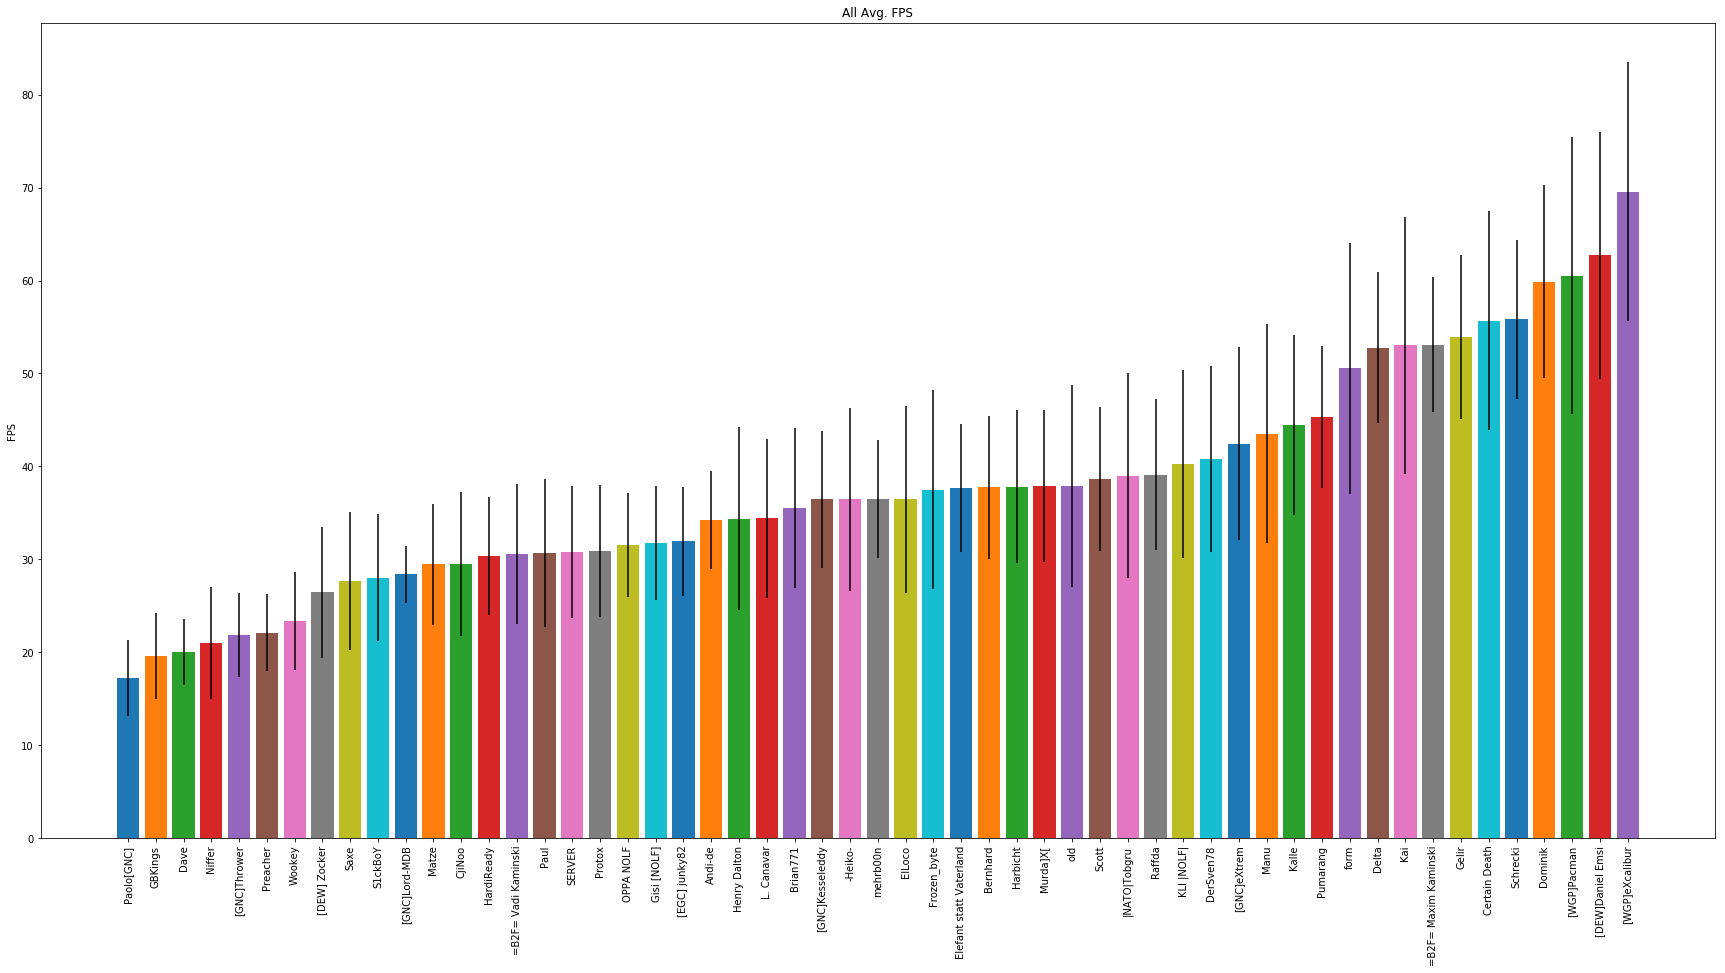

In [5]:
# plot data
col = 0
# all avg fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: np.mean(kv[1][col])):
    plt.bar(name, np.mean(data[col]), yerr=np.std(data[col]), label=name)

plt.ylabel("FPS")
plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("All Avg. FPS")
plt.savefig(os.path.join(os.curdir, r"output\all_avg_fps.png"))

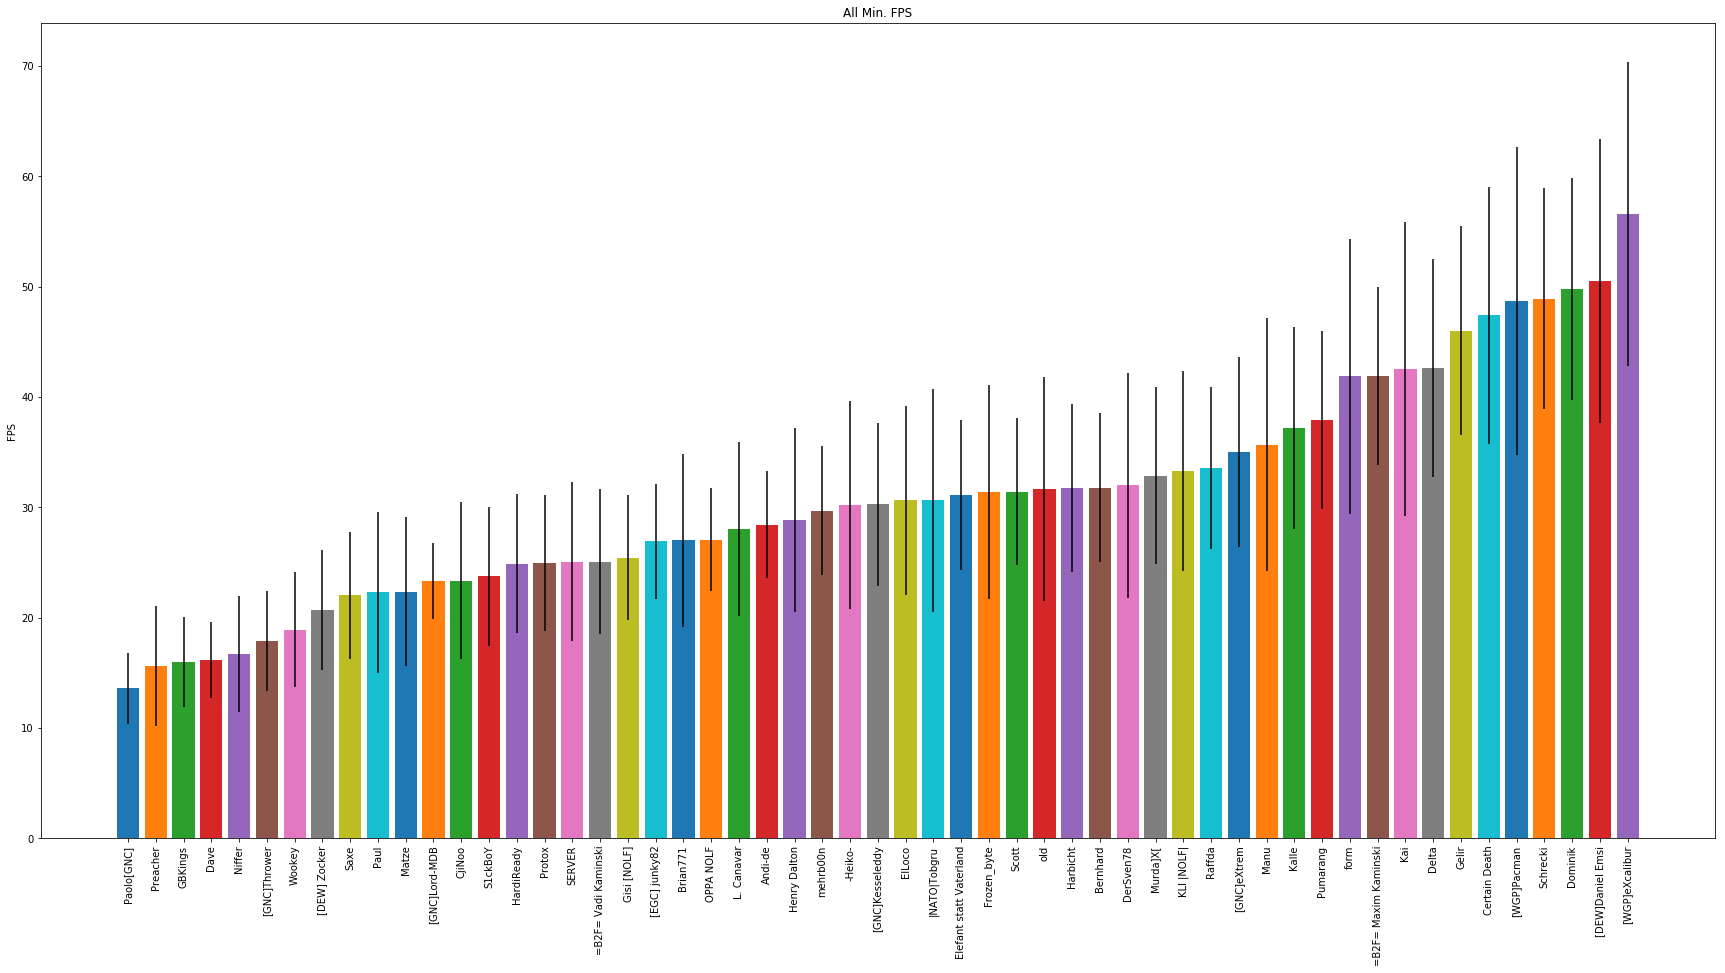

In [6]:
# plot data
col = 1
# all min fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: np.mean(kv[1][col])):
    plt.bar(name, np.mean(data[col]), yerr=np.std(data[col]), label=name)

plt.ylabel("FPS")
plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("All Min. FPS")
plt.savefig(os.path.join(os.curdir, r'output\all_min_fps.png'))

[26.99013899 35.05662142 39.03461187 39.97459773 38.92706641 36.77127368
 36.28739325 35.84970248 35.63654212 36.67467578 36.67320101 37.49718206
 37.90508862 37.93236952 38.51784693 38.42881647 39.33088295 40.84971004
 41.19325329 42.0892755  41.84603447 41.17953116 40.53116066 40.03030303
 40.59005146 41.03381524 41.13909989 41.13517929 40.53466807 40.47999257
 39.83430628 39.63308365 39.88670757 39.65175458 39.42640773 39.74162907
 40.19955861 40.47865207 39.40157881 39.09481368 38.34725405 37.47169171
 37.02402173 37.22349546 37.85943468 36.77933452 36.12384348 36.43421781
 36.23398523 36.79409897 37.16581978 37.88950683 38.90266413 38.17488471
 38.20053538 38.58416998 38.82876049 39.66671967 39.81597314 40.26230232
 40.22537327 39.83912006 38.84733634 38.41637954 38.49067939 38.331213
 38.04629384 37.52478134 37.00485909 37.04814913 36.69758813 36.62399505
 36.64820214 36.44209405 36.20529624 35.99151172 36.38999019 36.86378913
 37.17780175 37.31714158 37.46634827 37.36381282 37.3

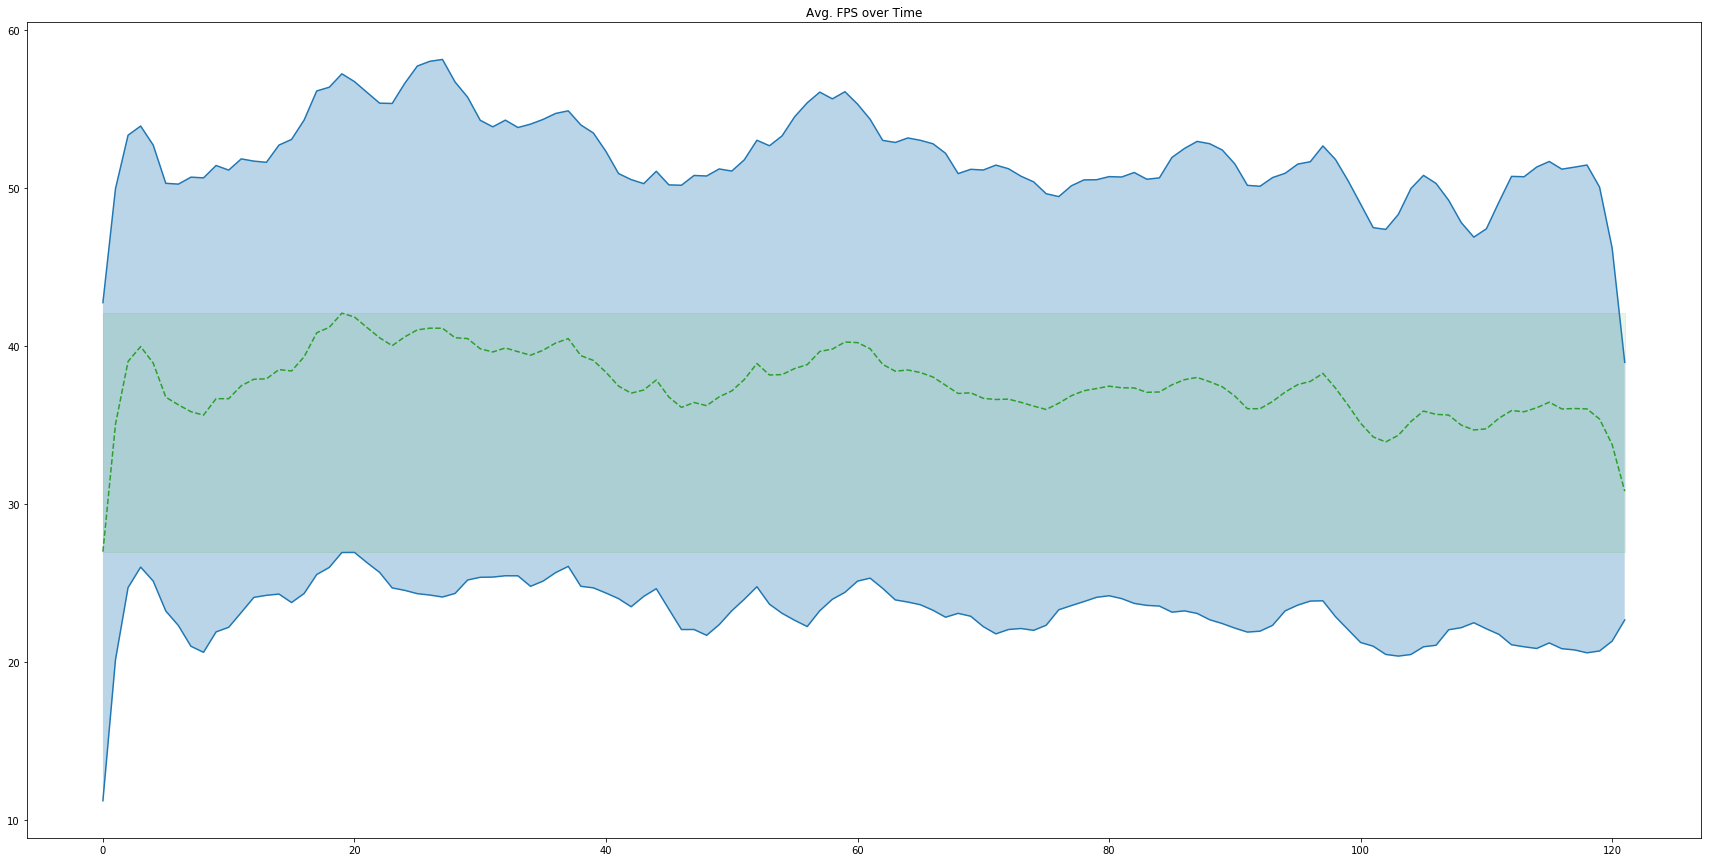

In [17]:
# plot data
from scipy import signal
col = 0

max_nr_fps = np.max([len(x[col]) for name, x in player_fps.items() if name != 'SERVER'])
M = np.empty((len(player_fps) - 1, max_nr_fps))
M[:] = np.nan
for i, kv in enumerate([(name, x) for name, x in player_fps.items() if name != 'SERVER']):
    name, data = kv
    x = data[col]
    M[i, 0:len(x)] = x

# all avg fps over time
degree = 3
window_length = 9
fig = plt.figure(figsize=(30,15))
y1 = signal.savgol_filter(np.nanmean(M, 0) - np.nanstd(M, 0), window_length, degree)
y2 = signal.savgol_filter(np.nanmean(M, 0) + np.nanstd(M, 0), window_length, degree)
y = signal.savgol_filter(np.nanmean(M, 0), window_length, degree)
print(y)

xx = range(max_nr_fps)
plt.fill_between(x=xx, y1=y1, y2=y2, alpha=0.3)
plt.plot(xx, y1, color="C0")
plt.plot(xx, y2, color="C0")
plt.plot(xx, y, "--", color="C2")
plt.fill_between(xx, y1=np.repeat(np.min(y), max_nr_fps), y2=np.repeat(np.max(y), max_nr_fps), alpha=0.1, color="C2")
#plt.legend(loc="right")
plt.title("Avg. FPS over Time")
plt.savefig(os.path.join(os.curdir, r'output\all_avg_fps_over_time.png'))

[16.93727633 26.80184444 31.62379334 32.73520697 31.46816926 29.15239094
 28.82731478 28.30104882 28.25798113 29.6150771  30.07939231 31.05995263
 31.5610553  31.82398105 32.48542024 32.29420894 32.89692069 34.07359307
 34.43633096 34.97909009 34.72678265 33.93032753 33.0240954  32.33872417
 32.72098342 33.11590296 33.61569877 33.60565221 33.40419736 33.29817599
 32.67265168 32.60627842 32.81261641 32.5991579  32.61866645 32.58647198
 32.87080893 32.96019014 32.17553688 31.84407096 31.07622443 30.46778711
 30.20023767 30.37611408 30.99023852 30.29909176 30.03479671 30.07532468
 29.92383499 30.56097106 30.72347606 31.25571683 32.01631042 31.51979857
 31.63144271 31.73990989 31.89198692 32.53218482 32.57734782 32.9509674
 32.87127838 32.62947257 32.02500221 31.66905204 31.89769414 32.01175015
 32.01625585 31.36266455 30.68972524 30.33377507 29.97040375 29.89018465
 30.1423878  30.31345157 30.34222781 30.0957773  30.36202107 30.49603543
 30.54198428 30.57537554 30.57195793 30.58314512 30.

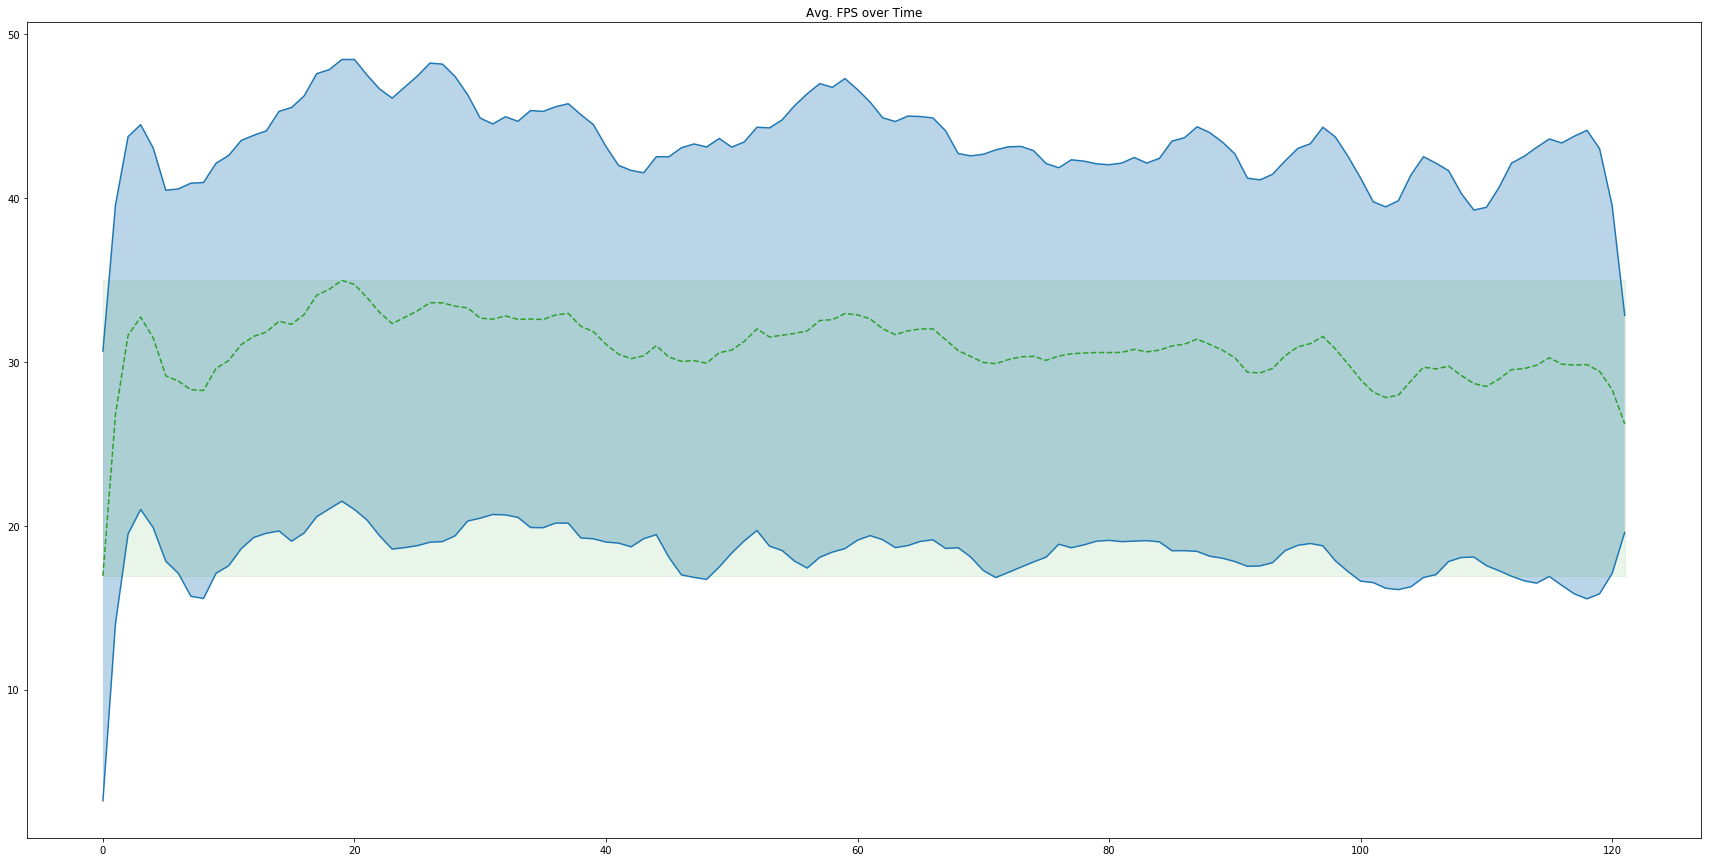

In [18]:
# plot data
from scipy import signal
col = 1

max_nr_fps = np.max([len(x[col]) for name, x in player_fps.items() if name != 'SERVER'])
M = np.empty((len(player_fps)-1, max_nr_fps))
M[:] = np.nan
for i, kv in enumerate([(name, x) for name, x in player_fps.items() if name != 'SERVER']):
    name, data = kv
    x = data[col]
    M[i, 0:len(x)] = x

# all avg fps over time
degree = 3
window_length = 9
fig = plt.figure(figsize=(30,15))
y1 = signal.savgol_filter(np.nanmean(M, 0) - np.nanstd(M, 0), window_length, degree)
y2 = signal.savgol_filter(np.nanmean(M, 0) + np.nanstd(M, 0), window_length, degree)
y = signal.savgol_filter(np.nanmean(M, 0), window_length, degree)
print(y)

xx = range(max_nr_fps)
plt.fill_between(x=xx, y1=y1, y2=y2, alpha=0.3)
plt.plot(xx, y1, color="C0")
plt.plot(xx, y2, color="C0")
plt.plot(xx, y, "--", color="C2")
plt.fill_between(xx, y1=np.repeat(np.min(y), max_nr_fps), y2=np.repeat(np.max(y), max_nr_fps), alpha=0.1, color="C2")
#plt.legend(loc="right")
plt.title("Avg. FPS over Time")
plt.savefig(os.path.join(os.curdir, r'output\all_min_fps_over_time.png'))

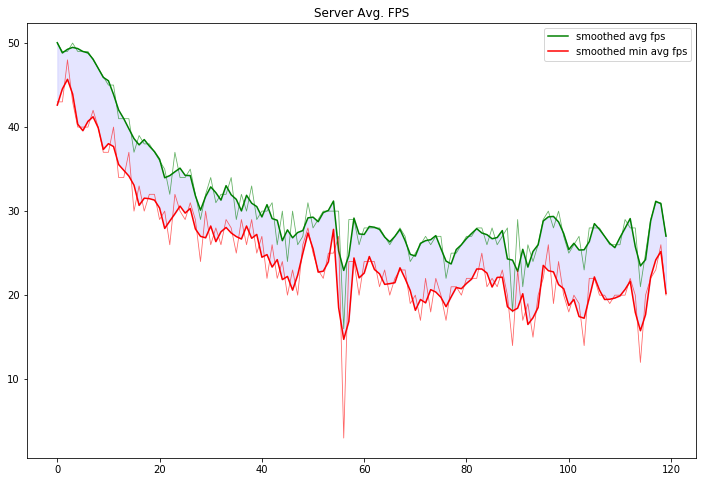

In [55]:

fig = plt.figure(figsize=(12,8))

col = 0
window_length=5
degree=3
xx = range(len(player_fps.get('SERVER')[col]))
y_smooth_avg = signal.savgol_filter(player_fps.get('SERVER')[col], window_length, degree)
y = player_fps.get('SERVER')[col]
plt.plot(xx, y, alpha=0.6, lw=0.8, color='g')
plt.plot(xx, y_smooth_avg, label='smoothed avg fps', color='g')


col = 1
window_length=5
degree=3
xx = range(len(player_fps.get('SERVER')[col]))
y_smooth_min = signal.savgol_filter(player_fps.get('SERVER')[col], window_length, degree)
y = player_fps.get('SERVER')[col]
plt.plot(xx, y, alpha=0.6, lw=0.8, color='r')
plt.plot(xx, y_smooth, label='smoothed min avg fps', color='r')
plt.fill_between(xx, y_smooth_avg, y_smooth_min, alpha=0.1, color='b')

plt.legend()
plt.title('Server Avg. FPS')
plt.savefig(os.path.join(os.curdir, r'output\server_fps_min_and_avg.png'))